In [117]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error , roc_auc_score ,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
# load dataset 
df = pd.read_csv('cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# Data Preprocessing

In [42]:
df.shape

(8128, 12)

In [4]:
df.info()
# i found max_power column is object ---> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [52]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [88]:
# i found there are missing values so i should investigate in them
# i will use Imputing or filling missing values with mean for numeric value amd mode for categorical value

# the common value in mileage(km/ltr/kg) column is : 18.90
# the common value in engine column is : 1248.0 
# the common value in max_power column is : 74
# the common value in seats column is : 5.0

df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean()) 
df['engine'] = df['engine'].fillna(df['engine'].mean()) 
df['seats'] = df['seats'].fillna(df['seats'].mean()) 
df['max_power'] = df['max_power'].replace(" " , "74")
df['max_power']  = df['max_power'].astype('float') 
df['year']  = df['year'].astype('object') 

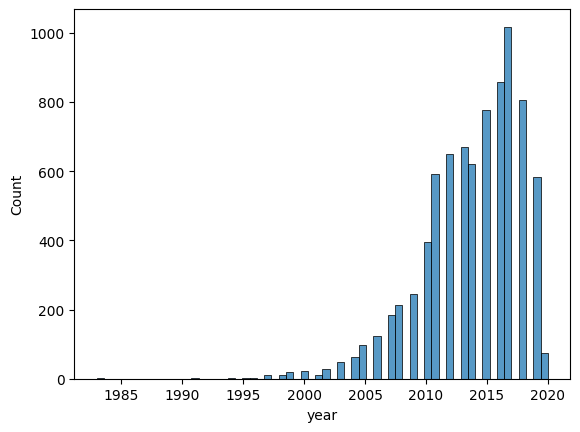

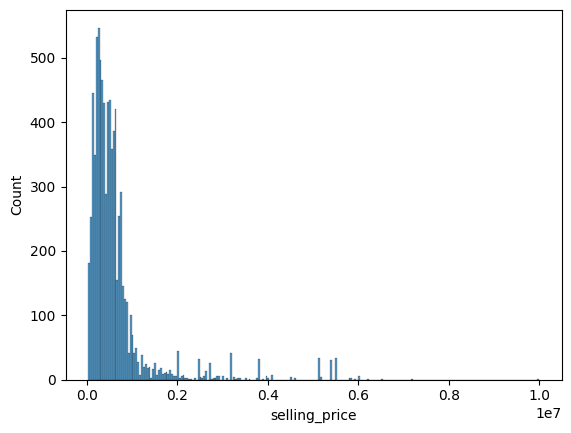

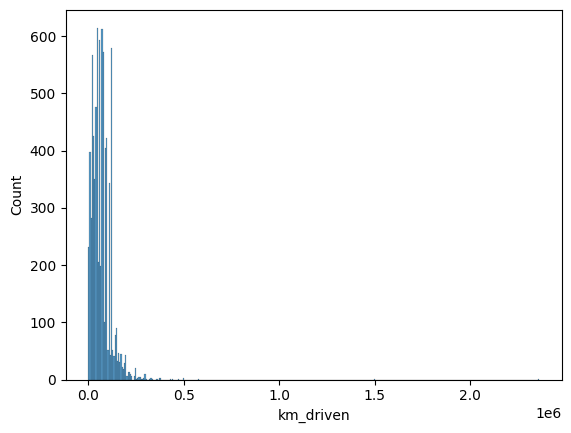

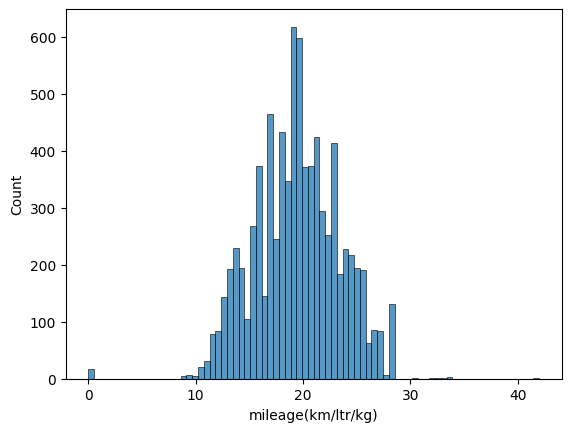

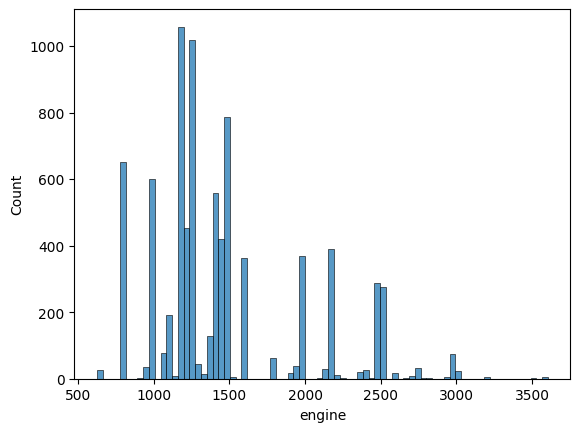

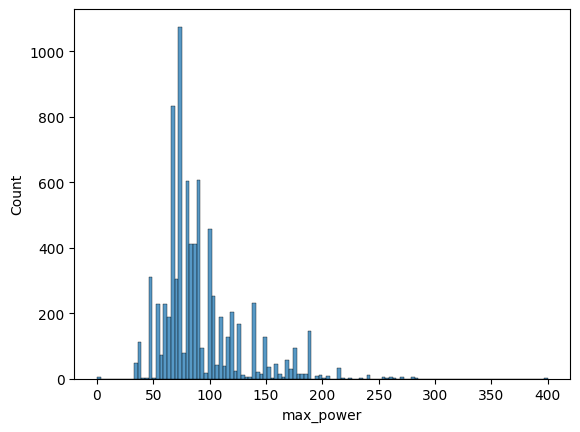

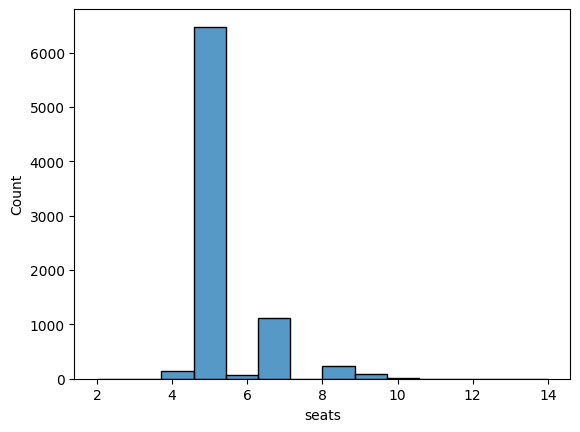

In [82]:
num_col = df.select_dtypes(include=['int64' , 'float64'])
cat_col = df.select_dtypes(include=['object'])
for x in num_col : 
    df[x] = df[x].astype('float64')
    sns.histplot(data = df , x = x )
    plt.show()

# EDA

In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   object 
 2   selling_price       8128 non-null   float64
 3   km_driven           8128 non-null   float64
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(6), object(6)
memory usage: 762.1+ KB


In [96]:
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].replace(0 , 19.42)
df['max_power'] = df['max_power'].replace(0 , 91.05)
df['km_driven'] = df['km_driven'].replace(1,69819.51)

In [97]:
# average selling price per each owner
sellin_price_per_owner = df.groupby('owner').agg({'selling_price' : "mean" , 'mileage(km/ltr/kg)' : "mean" , "max_power": "mean"}).reset_index()
sellin_price_per_owner.columns = ['Owner' , 'Average_Selling_Price' , 'Avg_mileage(km/ltr/kg)' , 'avg_max_power']
sellin_price_per_owner = round(sellin_price_per_owner ,1).sort_values(by ='Average_Selling_Price' , ascending=False)
sellin_price_per_owner

# i found Test Drive Car and first owner are the highest Selling price 

,Owner,Average_Selling_Price,Avg_mileage(km/ltr/kg),avg_max_power
3,Test Drive Car,4403800.0,16.9,162.3
0,First Owner,783086.4,19.9,94.3
2,Second Owner,392964.5,18.8,85.9
4,Third Owner,284015.3,18.1,83.4
1,Fourth & Above Owner,225813.2,17.7,81.6


In [98]:
round(df.describe() , 2)

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.00,8128.00,8128.00,8128.00,8128.00,8128.00
mean,638271.81,69828.10,19.46,1458.63,91.12,5.42
std,806253.40,56545.25,3.88,497.02,35.37,0.95
min,29999.00,1000.00,9.00,624.00,32.80,2.00
25%,254999.00,35000.00,16.80,1197.00,69.00,5.00
50%,450000.00,60000.00,19.42,1248.00,81.86,5.00
75%,675000.00,98000.00,22.28,1582.00,101.25,5.00
max,10000000.00,2360457.00,42.00,3604.00,400.00,14.00


In [101]:
num_col = df.select_dtypes(include=['int64' , 'float64'])
cat_col = df.select_dtypes(include=['object'])
cat_col

,name,year,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014.0,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014.0,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006.0,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010.0,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007.0,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013.0,Petrol,Individual,Manual,First Owner
8124,Hyundai Verna CRDi SX,2007.0,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,2009.0,Diesel,Individual,Manual,First Owner
8126,Tata Indigo CR4,2013.0,Diesel,Individual,Manual,First Owner


In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in cat_col : 
    df[x] = le.fit_transform(df[x])

In [135]:
X = df.drop('selling_price' , axis = 1)
y = df['selling_price']
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size= 0.3 , random_state=42)
X_temp, X_val, y_temp, y_val  = train_test_split(X_test ,y_test ,test_size= 0.3 , random_state=42)
print(X_train.shape ,X_test.shape) 

(5689, 11) (2439, 11)


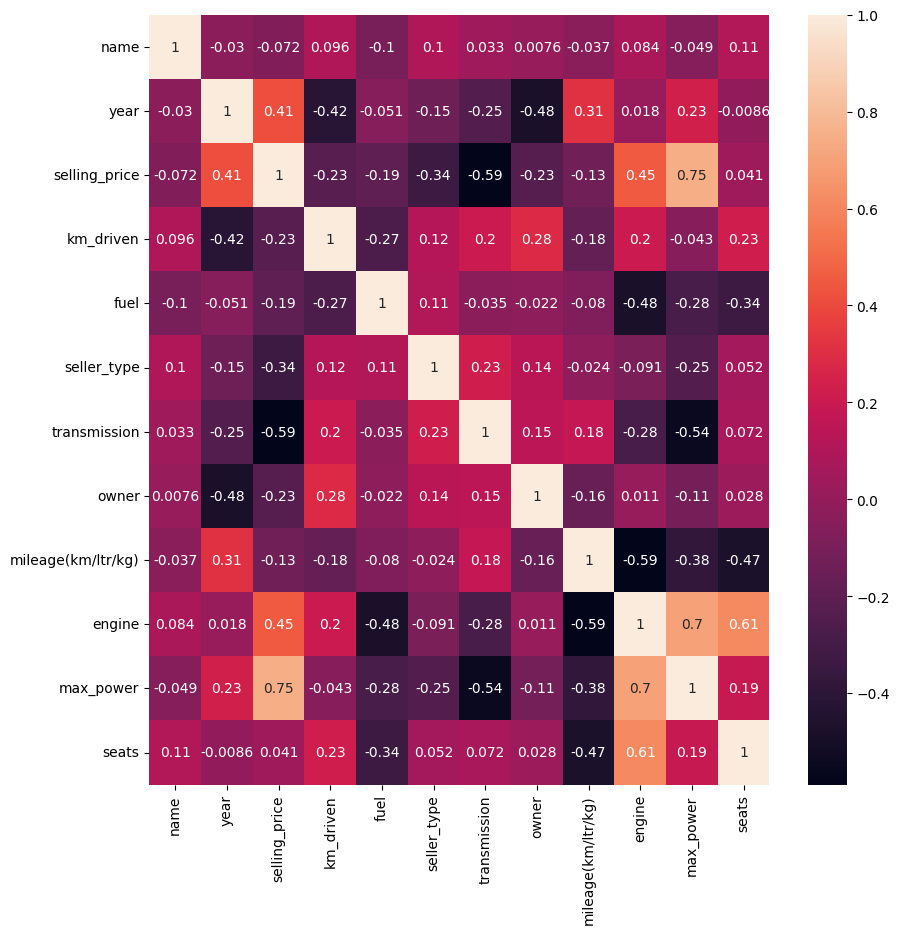

In [113]:
plt.figure(figsize=(10 , 10))
corr = df.corr()
sns.heatmap(data = corr , annot=True)
plt.show()

In [129]:
# Scaling and use linear regression
# 1. Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#2. use linear regression
lg = LinearRegression()
lg.fit(X_train_scaled , y_train)
y_pred = lg.predict(X_test_scaled)
print(f"mean_squared_error : {mean_squared_error(y_test , y_pred)}")
print(f"r2_score : {r2_score(y_test , y_pred)}")
print(f" mean_absolute_error: {mean_absolute_error(y_test , y_pred)}")

mean_squared_error : 218229165008.55844
r2_score : 0.6832028940109852
 mean_absolute_error: 276187.2660923234


In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
print(f"mean_squared_error : {mean_squared_error(y_test , y_pred)}")
print(f"r2_score : {r2_score(y_test , y_pred)}")
print(f" mean_absolute_error: {mean_absolute_error(y_test , y_pred)}")

mean_squared_error : 32043836725.670864
r2_score : 0.9534828686207963
 mean_absolute_error: 69216.1289699987


In [145]:
# improvements so we will use Hyperparameter tuning
from sklearn.model_selection import GridSearchCV ,cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import numpy as np
scoring = {'rmse' : make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))}
kf = KFold(n_splits=5 , shuffle=True , random_state=42)
train_cv_results = cross_val_score(rf , X_train ,y_train,cv=kf , scoring=scoring['rmse'] )
val_cv_results = cross_val_score(rf , X_train ,y_train,cv=kf , scoring=scoring['rmse'] )
print(f"train_cv_results : {train_cv_results}")
print(f"val_cv_results : {val_cv_results}")

train_cv_results : [145791.57603597 182786.02718495 160693.85496358 147385.86635606
 133803.16296441]
val_cv_results : [148932.46724279 175971.97161762 162921.81944956 150150.57316289
 134483.73347647]


In [146]:
if train_cv_results.mean() < val_cv_results.mean() and train_cv_results.mean() < train_cv_results.mean() * 1.1:
    print("The model might be overfitting.")
elif train_cv_results.mean() > val_cv_results.mean():
    print("The model might be underfitting.")
else:
    print("The model is fitting well.")

The model might be overfitting.


In [148]:
# parameters of RandomForestRegressor
param_grads = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],    
}
# Now Using GridSearchCv

rf_cv =GridSearchCV(rf ,param_grid=param_grads ,cv=kf , scoring="scoring")
rf_cv.fit(X_train , y_train)
print(f"best paramters {rf_cv.best_params_}")
print(f"best score {rf_cv.best_score_}")

best paramters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
best score -23715285523.741467


In [149]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = None ,min_samples_leaf = 1 ,min_samples_split = 2 , n_estimators = 300 )
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
print(f"mean_squared_error : {mean_squared_error(y_test , y_pred)}")
print(f"r2_score : {r2_score(y_test , y_pred)}")
print(f" mean_absolute_error: {mean_absolute_error(y_test , y_pred)}")

mean_squared_error : 30864008513.514153
r2_score : 0.955195591863635
 mean_absolute_error: 68616.75495663163
